In [26]:
import pandas as pd
import regex as re
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [156]:
df = pd.read_csv("Four_YearPoll.csv")
df.head(5)
t = df["Country"].tolist()
che = df.replace(to_replace='None', value=np.nan).dropna()
che

,Country,Poll_2021,Poll_2020,Poll_2019,Poll_2018
0,Pakistan,66.8,59.0,65.8,74.3
1,India,58.1,51.9,58.1,72.5
3,Bahrain,49.8,39.7,46.8,59.8
4,Nepal,46.0,39.2,44.5,54.1
5,Uzbekistan,42.8,29.9,41.2,34.3
...,...,...,...,...,...
73,Canada,8.5,7.3,7.7,7.9
77,Norway,7.5,5.7,6.9,7.6
78,Portugal,7.1,9.1,9.3,9.4
82,Estonia,5.9,5.9,6.2,7.2


In [195]:
#hot encode country variable 
fin = pd.get_dummies(che, columns=["Country"])

xx = fin.drop("Poll_2021", axis = 1)
yy = fin["Poll_2021"]
xx

,Poll_2020,Poll_2019,Poll_2018,Country_Afghanistan,Country_Austria,Country_Bahrain,Country_Belgium,Country_Bosnia Herzegovina,Country_Brazil,Country_Bulgaria,...,Country_Sri Lanka,Country_Taiwan,Country_Thailand,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_Uzbekistan,Country_Vietnam
0,59.0,65.8,74.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,51.9,58.1,72.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39.7,46.8,59.8,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,39.2,44.5,54.1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,29.9,41.2,34.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,7.3,7.7,7.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,5.7,6.9,7.6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,9.1,9.3,9.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,5.9,6.2,7.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
x_train, x_test, y_train, y_test = train_test_split(xx,yy, test_size = 0.2, random_state=101)
model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
math.sqrt(mean_squared_error(predictions, y_test))
list_pred = predictions.tolist()
list_ytest = y_test.tolist()

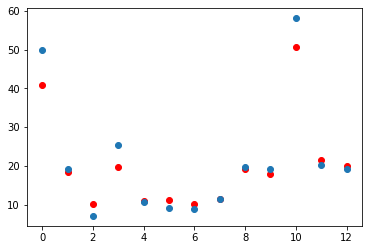

In [197]:
acc = pd.DataFrame({"Predicted": list_pred, "Actual": list_ytest})
acc1 = acc.reset_index()
acc1 = acc1.sort_values(["Actual"], ascending = False)
plt.scatter(acc1['index'], acc1['Predicted'], c = "red")
plt.scatter(acc1['index'], acc1['Actual'])

In [199]:
mse = mean_squared_error(y_test, predictions)
new = acc.assign(diff = acc['Predicted'] - acc['Actual'])
difference = abs(new['diff']).mean()
difference
mse

14.677305500482305

{'whiskers': [<matplotlib.lines.Line2D at 0x177e777f0>,
 'caps': [<matplotlib.lines.Line2D at 0x177e77d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x177e77640>,
 'medians': [<matplotlib.lines.Line2D at 0x177e86370>,
 'fliers': [<matplotlib.lines.Line2D at 0x177e86640>,
 'means': []}

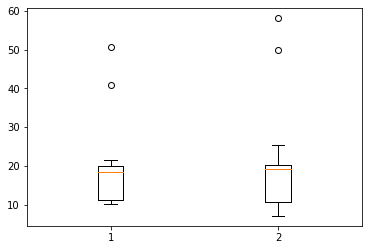

In [198]:
plt.boxplot(acc)

Web Scraping and Data Analysis: Scraped over three different websites using BeautifulSoup to collect data about factors that effected the pollution levels around the globe. Created visualizations that provided insights regarding the causality and factors of the pollution levels. Implemented a linear regression model to predict the pollution score of each country after data wrangling and analysis. 

In [204]:
abs(new['diff']).mean()

2.6163405529909314